In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from shapely.geometry import LineString
matplotlib.rcParams['figure.figsize'] = (40.0, 40.0)
matplotlib.rcParams['font.size'] = 25

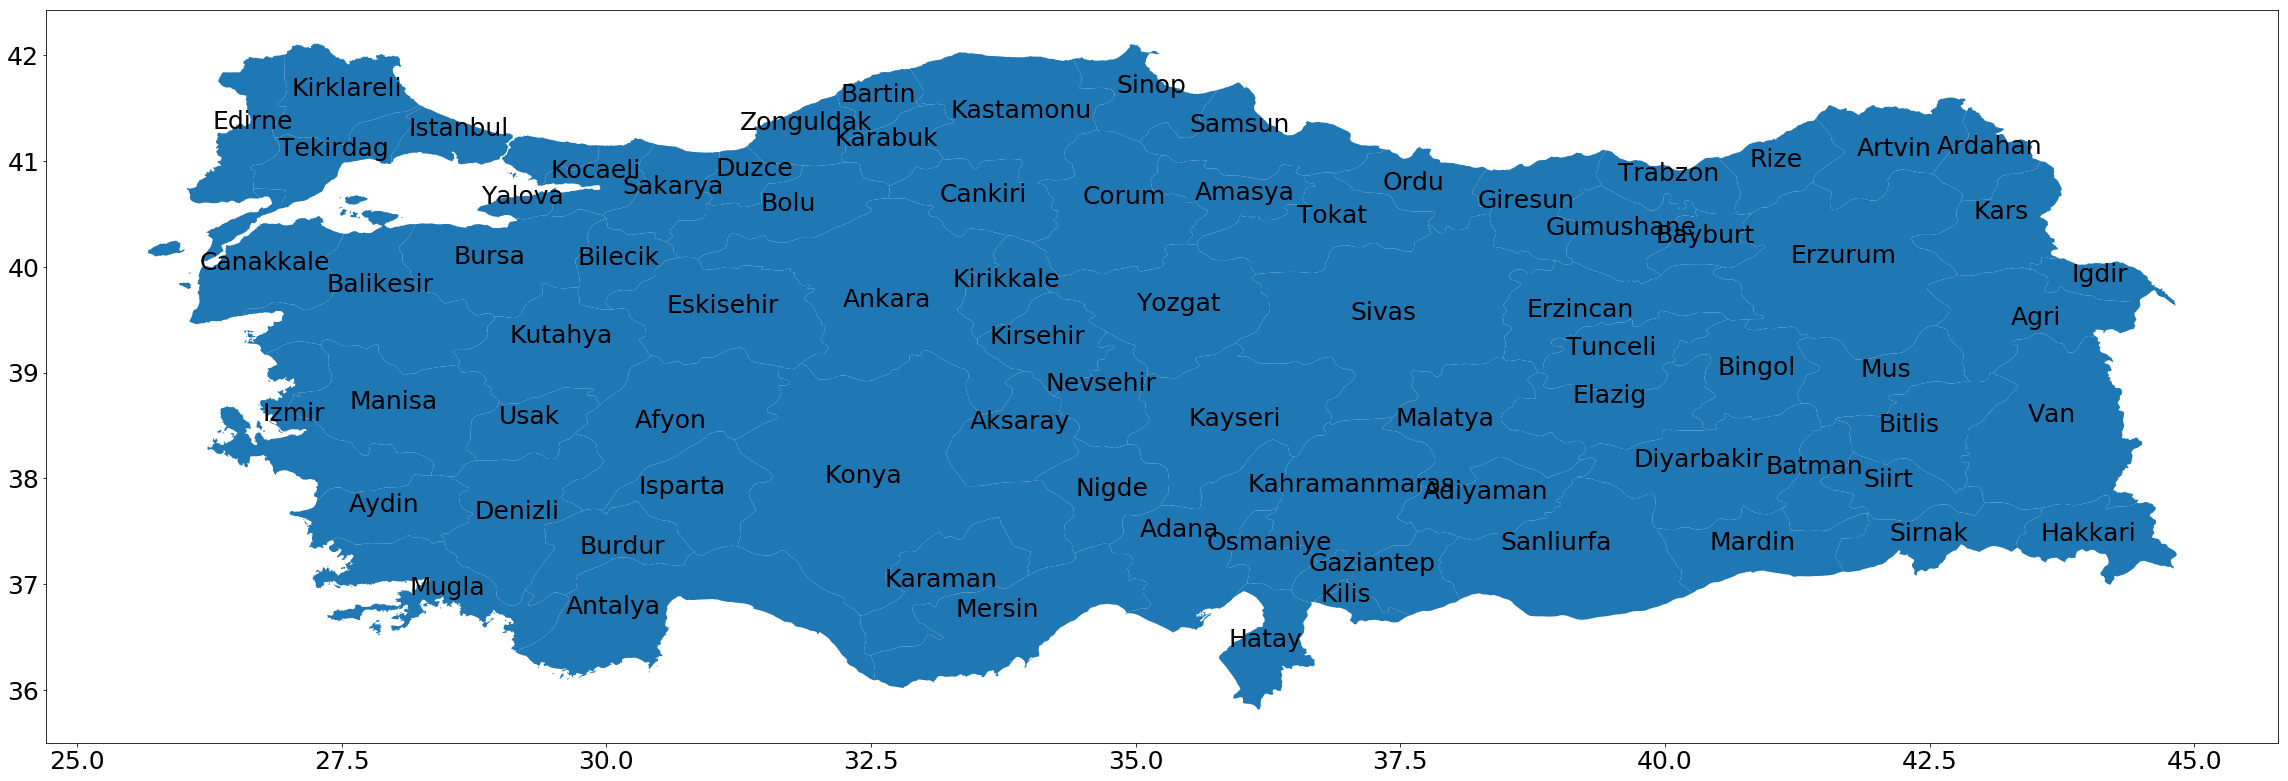

In [14]:
provinces_map = gpd.read_file('/home/arnau/Documents/D4R/maps/provinces.SHP')
provinces_map = provinces_map
provinces_map['coords'] = provinces_map['geometry'].apply(lambda x: x.representative_point().coords[:])
provinces_map['coords'] = [coords[0] for coords in provinces_map['coords']]
provinces_map.plot()
for idx, row in provinces_map.iterrows():
    plt.annotate(s=row['NAME1_'], xy=row['coords'],
                 horizontalalignment='center')

In [15]:
provinces_map.head()

,ID_,NAME1_,NAME2_,PARTS_,POINTS_,LENGTH_,AREA_,geometry,coords
0,ASITUR002001003,Kirklareli,Tekirdag,1,356,280.8056,2977.018,"POLYGON ((26.957624 42.00381, 26.962696 42.003...","(27.549858122275577, 41.6158365)"
1,ASITUR008002003,Sinop,Kastamonu,1,215,277.5320,2222.687,"POLYGON ((34.409332 41.963691, 34.412673 41.96...","(35.15187179535508, 41.643062)"
2,ASITUR008002001,Kastamonu,Kastamonu,1,213,367.3627,5469.897,"POLYGON ((32.871307 41.87305, 32.874507 41.874...","(33.91479987137363, 41.4094745)"
3,ASITUR002001002,Edirne,Tekirdag,1,417,321.5796,2265.209,"POLYGON ((26.957624 42.00381, 26.959184 41.834...","(26.66148196825155, 41.3008765)"
4,ASITUR008001003,Bartin,Zonguldak,1,112,148.5528,1101.471,"POLYGON ((32.180297 41.645309, 32.182918 41.64...","(32.56493688609863, 41.560387999999996)"


In [16]:
Manisa = provinces_map[ provinces_map.NAME1_ == 'Manisa'].coords.squeeze()
Usak= provinces_map[ provinces_map.NAME1_ == 'Usak'].coords.squeeze()

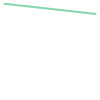

In [18]:
line = LineString([Manisa, Usak])
line

In [20]:
provinces_map['migration_lines'] = line

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

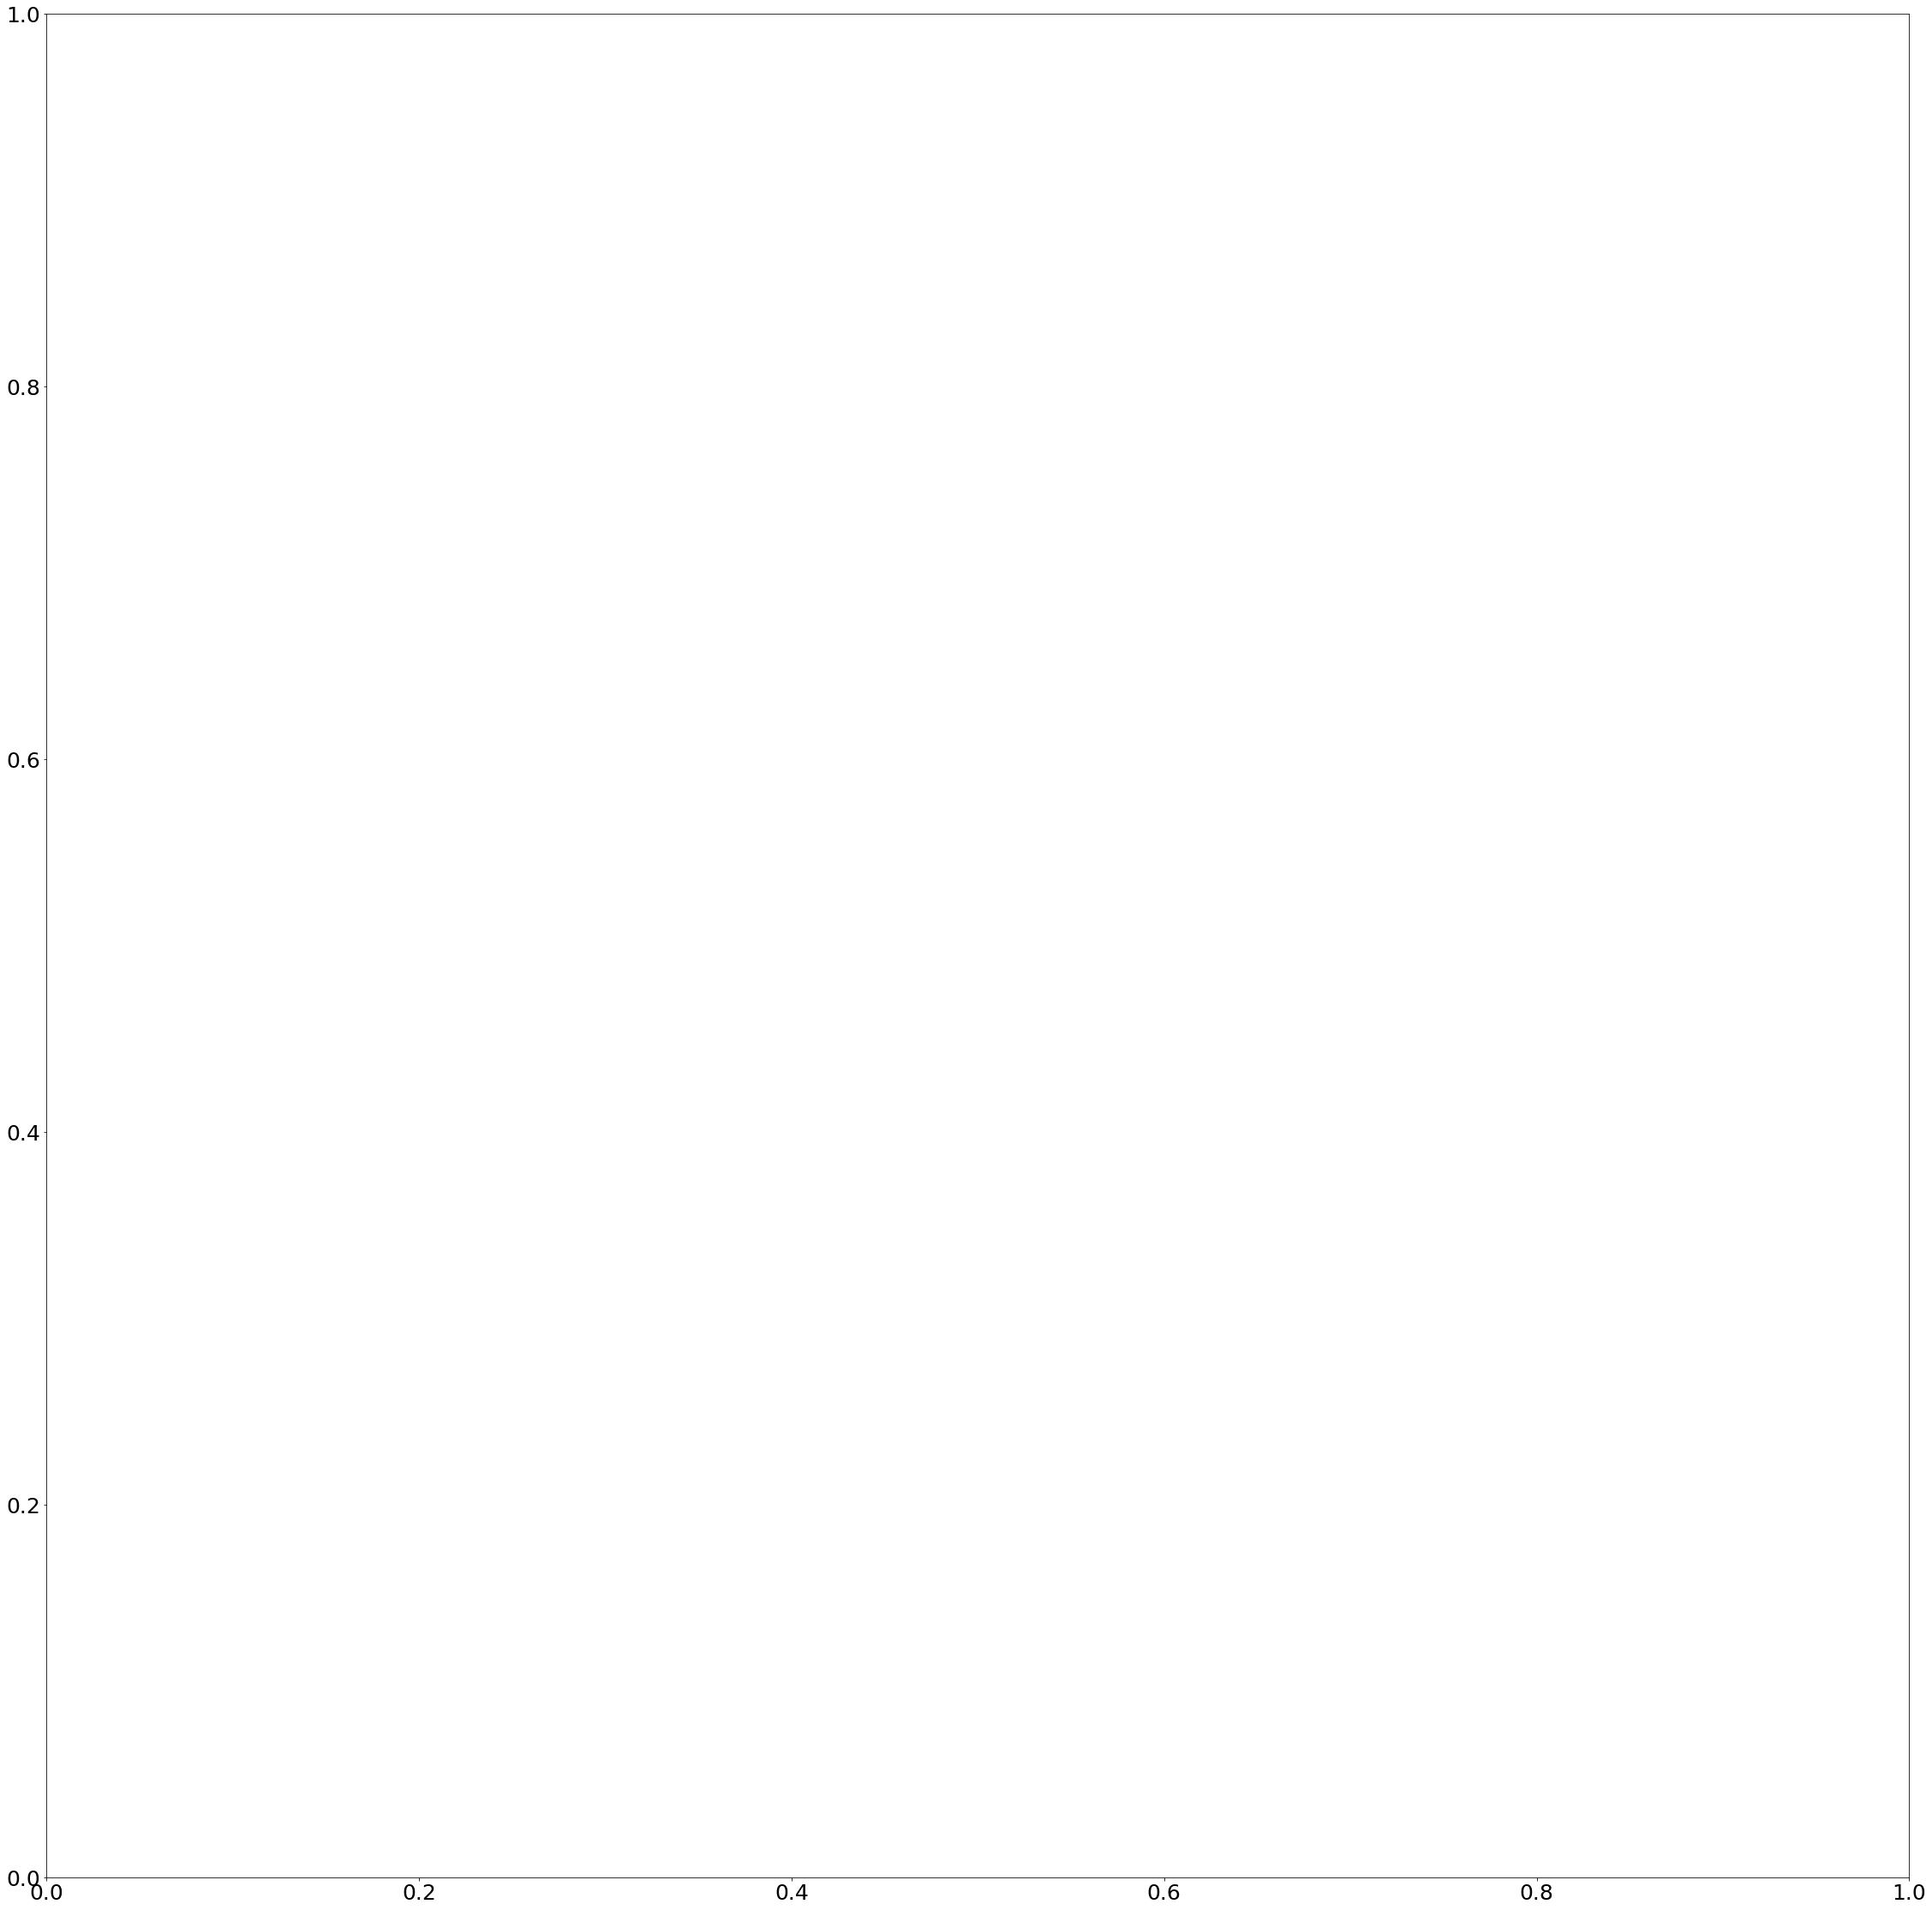

In [32]:
gpd.GeoSeries([provinces_map,Manisa, Usak, line]).plot()

In [68]:
migration = pd.read_excel('additional_data/excel_files/population/migration.xls')

In [69]:
migration.head()

,Total,Adana,Adıyaman,Afyonkarahisar,Ağrı,Amasya,Ankara,Antalya,Artvin,Aydın,...,Bartın,Ardahan,Iğdır,Yalova,Karabük,Kilis,Osmaniye,Düzce,Yurt dışı Abroad,Bilinmeyen Unknown
Toplam-Total,2684820,78422,34453,28264,40965,18889,121902,36961,12760,25531,...,9312,11374,11733,4077,11464,7058,27833,11054,22972,26828
Adana,49509,21992,785,82,184,61,827,344,35,92,...,16,19,29,23,32,136,2243,24,332,477
Adıyaman,18040,460,9448,21,57,12,208,93,4,44,...,12,7,12,9,25,42,199,8,45,115
Afyonkarahisar,21453,271,100,7301,143,68,943,590,23,281,...,27,27,36,11,31,12,111,28,124,189
Ağrı,15088,183,115,112,6201,63,427,99,18,118,...,16,26,231,14,34,8,107,29,53,73
